In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pymc3 import *
import theano
from patsy import dmatrices

## Read in and look at data

In [2]:
data = pd.read_table("QT_data.txt")

In [3]:
data.head(5)

Compound uniq.cpd  hERG.IC50     cmax  QT.increase     QT.label  log.herg  \
0         1        1        0.4  0.25494            1  QT increase -0.397940   
1         2        2        0.4  0.10532            1  QT increase -0.397940   
2         3        3        0.6  0.25410            1  QT increase -0.221849   
3         4        4        2.0  0.20341            1  QT increase  0.301030   
4         5        5        3.0  0.23472            1  QT increase  0.477121   

   log.cmax    margin  
0 -0.593562  0.195622  
1 -0.977489  0.579549  
2 -0.594995  0.373147  
3 -0.691628  0.992658  
4 -0.629450  1.106571

## Plot Figure 1B

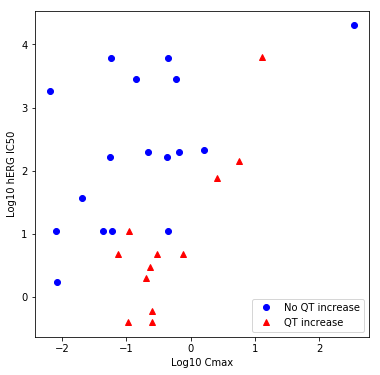

In [5]:
plt.figure(figsize=(6,6));
plt.plot("log.cmax", "log.herg", "bo", data=data[data["QT.increase"] == 0 ], label="No QT increase");
plt.plot("log.cmax", "log.herg", "r^", data=data[data["QT.increase"] == 1 ], label="QT increase");
plt.xlabel("Log10 Cmax");
plt.ylabel("Log10 hERG IC50");
plt.legend(loc="lower right");

## Define function

In [6]:
def invlogit(x):
    return np.exp(x) / (1 + np.exp(x))

## Fit Bayes model (no parameter constraints)

In [11]:
with Model() as m1:
    # priors
    b0 = Normal("b0", 0, sd=10)
    b1 = Normal("b1", 0, sd=10)
    b2 = Normal("b2", 0, sd=10)
    b3 = Normal("b3", 0, sd=10)
    
    # likelihood
    linpred = Deterministic("linpred", b0 + b1*data["log.herg"] +
                            b2*data["log.cmax"] + b3*data["log.herg"]*data["log.cmax"] )
    theta = invlogit(linpred)
    y = Bernoulli("y", p=theta, observed=data["QT.increase"]) 
    
    # sample
    post = sample(draws=10000, seed=123, trace=[b0, b1, b2, b3, linpred])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 97%|█████████▋| 10219/10500 [00:30<00:00, 339.72it/s]/usr/local/lib/python3.5/dist-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 3 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 10500/10500 [00:31<00:00, 332.12it/s]
/usr/local/lib/python3.5/dist-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))


## Summary statistics of parameters and predictions

In [12]:
df_summary(post)

mean        sd  mc_error    hpd_2.5   hpd_97.5
b0            6.848388  2.383481  0.022812   2.586566  11.691222
b1           -3.419851  1.144077  0.010139  -5.727948  -1.398281
b2            4.341249  1.781576  0.017611   1.014156   7.908739
b3           -0.374828  0.507326  0.004430  -1.387196   0.604975
linpred__0    5.543947  2.111325  0.017642   1.807689   9.793437
linpred__1    3.819958  1.909308  0.013696   0.366340   7.695148
linpred__2    4.974577  1.920493  0.016004   1.535871   8.817795
linpred__3    2.894422  1.309692  0.010083   0.530484   5.549069
linpred__4    2.596675  1.190894  0.009291   0.469090   5.023350
linpred__5   -0.029379  0.966098  0.004796  -1.957566   1.856271
linpred__6    2.397526  1.106141  0.008958   0.390503   4.618076
linpred__7   -0.492139  0.809065  0.003264  -2.125171   1.057521
linpred__8    1.853503  1.211171  0.010291  -0.402340   4.298906
linpred__9    2.144186  1.353490  0.011266  -0.443779   4.822894
linpred__10  -2.888448  1.654431  0.010390  -6.253795   0.166420
linpred__11  -2.758483  2.186591  0.017437  -7.182749   1.286336
linpred__12  -2.068715  1.129821  0.007169  -4.428770  -0.043675
linpred__13  -4.963735  2.041028  0.016996  -9.210895  -1.341842
linpred__14  -4.859334  1.817059  0.014065  -8.463628  -1.547899
linpred__15  -5.149582  1.964539  0.014419  -9.075381  -1.671242
linpred__16  -3.296646  1.454697  0.009610  -6.194638  -0.694688
linpred__17  -0.391024  1.039462  0.006395  -2.498072   1.615880
linpred__18  -0.924132  2.866898  0.018617  -6.822863   4.755790
linpred__19  -7.541140  2.920778  0.021848 -13.294475  -2.332994
linpred__20  -9.692921  3.783058  0.028499 -17.159436  -2.960961
linpred__21 -11.139090  4.316757  0.032728 -19.579194  -3.320237
linpred__22   4.098515  1.564668  0.014735   1.202693   7.181778
linpred__23   1.923705  1.001725  0.008331   0.092756   3.950413
linpred__24  -1.505049  0.988476  0.005445  -3.548970   0.289007
linpred__25  -2.000435  1.155602  0.006884  -4.319324   0.102922
linpred__26  -1.628634  1.117396  0.006557  -3.933641   0.397015
linpred__27  -5.655514  2.233811  0.016288 -10.088942  -1.673155
linpred__28  -7.096744  2.714751  0.020388 -12.580650  -2.392115

## Check that chains are mixing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39de43acc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f39de2b7da0>]], dtype=object)

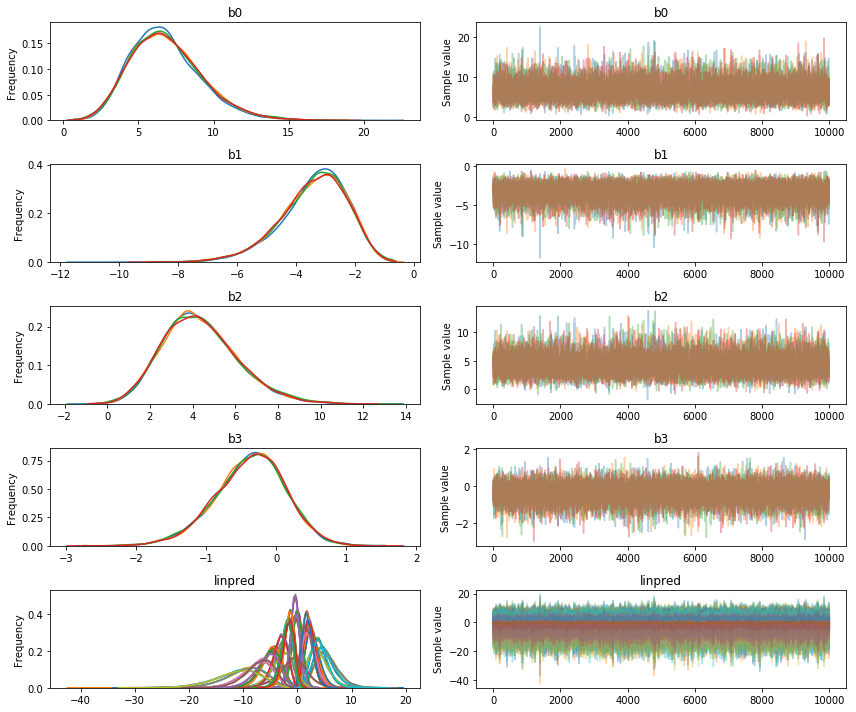

In [13]:
traceplot(post)

## Sample from posterior

In [14]:
ppc = sample_ppc(post, samples=5000, model=m1)

100%|██████████| 5000/5000 [00:02<00:00, 1787.76it/s]


## Map to 0-1 scale, sort, and plot

In [51]:
preds = invlogit(post["linpred"])
preds.sort(axis=1)

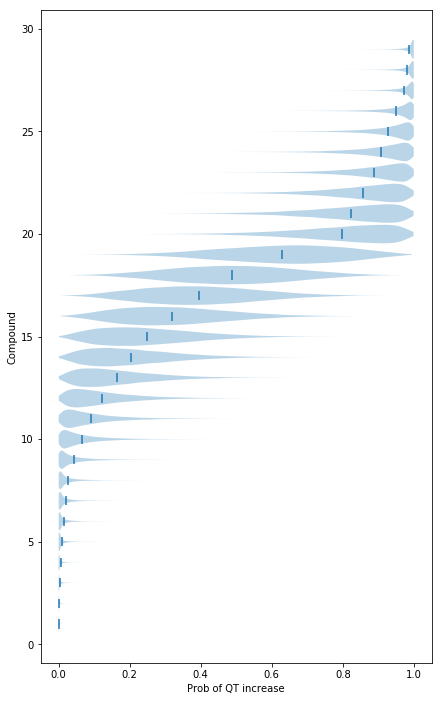

In [52]:
plt.figure(figsize=(7,12));
plt.violinplot(preds, vert=False,
              widths=0.9, showextrema=False, showmeans=True,
                      bw_method='silverman')
plt.xlabel("Prob of QT increase")
plt.ylabel("Compound")